In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
df = pd.read_csv('echonest.csv', header=[1,2], index_col=0).iloc[:, :15]
df

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
...                 ...          ...       ...              ...       ...   
124857         0.007592     0.790364  0.719288         0.853114  0.720715   
124862         0.041498     0.843077  0.536496         0.865151  0.547949   
124863         0.000124     0.609686  0.895136         0.846624  0.632903   
124864         0.327576     0.574426  0.548327         0.452867  0.075928   
124911         0.993606     0.499339  0.050622         0.945677  0.095965   

                                           metadata                       \
         speechiness    tempo   valence  album_date           album_name   
track_id                                                                   
2           0.159310  165.922  0.576661         NaN                  NaN   
3           0.461818  126.957  0.269240         NaN                  NaN   
5           0.124595  100.260  0.621661         NaN                  NaN   
10          0.032985  111.562  0.963590  2008-03-11    Constant Hitmaker   
134         0.525519  114.290  0.894072         NaN                  NaN   
...              ...      ...       ...         ...                  ...   
124857      0.082550  141.332  0.890461         NaN                  NaN   
124862      0.074001  101.975  0.476845         NaN                  NaN   
124863      0.051517  129.996  0.496667         NaN                  NaN   
124864      0.033388  142.009  0.569274         NaN                  NaN   
124911      0.065189  119.965  0.204652  2009-10-23  Suicide Beauty Girl   

                                                                   \
         artist_latitude                          artist_location   
track_id                                                            
2                32.6783                              Georgia, US   
3                32.6783                              Georgia, US   
5                32.6783                              Georgia, US   
10               39.9523                     Philadelphia, PA, US   
134              32.6783                              Georgia, US   
...                  ...                                      ...   
124857           52.1082                              Netherlands   
124862           52.1082                              Netherlands   
124863           52.1082                              Netherlands   
124864           52.1082                              Netherlands   
124911           35.7497  Higashiyamato-shi, Tokyo Prefecture, JP   

                                                                  
         artist_longitude      artist_name               release  
track_id                                                          
2               -83.22300             AWOL  AWOL - A Way Of Life  
3               -83.22300             AWOL  AWOL - A Way Of Life  
5               -83.22300             AWOL  AWOL - A Way Of Life  
10              -75.16240        Kurt Vile     Constant Hitmaker  
134             -83.22300             AWOL  AWOL - A Way Of Life  
...                   ...              ...                   ...  
124857            5.32986            Basic  Do You Know The Word  
124862            5.32986            Basic  Do You Know The Word  
124863            5.32986            Basic  Do You Know The Word  
124864            5.32986            Basic  Do You Know The Word  
124911          139.42200  

In [3]:
#df.set_index([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'track_id')], inplace = True)

In [4]:
df.index.name = None

In [5]:
df.columns = df.columns.droplevel(0)

In [6]:
df

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.16240,Kurt Vile,Constant Hitmaker
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,NaN,32.6783,"Georgia, US",-83.22300,AWOL,AWOL - A Way Of Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word
124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,NaN,52.1082,Netherlands,5.32986,Basic,Do You Know The Word


In [7]:
data = []
for folder in sorted(os.listdir('fma_small')):
    for file in sorted(os.listdir('fma_small/' + folder)):
        data.append((folder, file[:-4]))


In [8]:
tracklist = pd.DataFrame(data, columns=['Folder', 'track_id'])

tracklist['track_id'] = tracklist['track_id'].astype(int)

In [9]:
genre = pd.read_csv('tracks.csv', header=[0,1], index_col=0).iloc[:,39]
genre = pd.DataFrame(genre)
genre.index.name = None
genre.columns = ['genre']

In [10]:
genre

,genre
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN
...,...
155316,Rock
155317,Rock
155318,Rock
155319,Rock


In [11]:
title = pd.read_csv('fma_metadata/tracks.csv', header=[0,1], index_col=0).iloc[:,51]
title = pd.DataFrame(title)
title.index.name = None
title.columns = ['title']

In [12]:
title

,title
2,Food
3,Electric Ave
5,This World
10,Freeway
20,Spiritual Level
...,...
155316,The Auger
155317,Let's Skin Ruby
155318,My House Smells Like Kim Deal/Pulp
155319,The Man With Two Mouths


In [13]:
artist = pd.read_csv('fma_metadata/tracks.csv', header=[0,1], index_col=0).iloc[:,25]
artist = pd.DataFrame(artist)
artist.index.name = None
artist.columns = ['artist']

In [14]:
artist

,artist
2,AWOL
3,AWOL
5,AWOL
10,Kurt Vile
20,Nicky Cook
...,...
155316,Spowder
155317,Spowder
155318,Spowder
155319,Spowder


In [15]:
tracklist = tracklist.join(df, on='track_id', how='left').join(genre, on='track_id').join(title, on='track_id').join(artist, on='track_id')

In [16]:
tracklist

,Folder,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,genre,title,artist
0,000,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life,Hip-Hop,Food,AWOL
1,000,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,NaN,32.6783,"Georgia, US",-83.2230,AWOL,AWOL - A Way Of Life,Hip-Hop,This World,AWOL
2,000,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,39.9523,"Philadelphia, PA, US",-75.1624,Kurt Vile,Constant Hitmaker,Pop,Freeway,Kurt Vile
3,000,140,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991,NaN,NaN,41.8239,"Providence, RI, US",-71.4120,Alec K. Redfearn and the Eyesores,The Blind Spot,Folk,Queen Of The Wires,Alec K. Redfearn & the Eyesores
4,000,141,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950,NaN,NaN,41.8239,"Providence, RI, US",-71.4120,Alec K. Redfearn and the Eyesores,Every Man For Himself,Folk,Ohio,Alec K. Redfearn & the Eyesores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,154,154308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hip-Hop,MIA,Fleslit
7996,154,154309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hip-Hop,A1 Symphony,Fleslit
7997,154,154413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,Do Easy,Tasseomancy
7998,154,154414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,Dead Can Dance (uncensored),Tasseomancy


In [17]:
missing = tracklist[tracklist['acousticness'].isna()]

In [18]:
missing.reset_index(inplace=True)

In [19]:
missing

,index,Folder,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,...,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,genre,title,artist
0,5,000,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Experimental,Blackout 2,Contradiction
1,6,000,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock,Jules Lost His Jewels,Ariel Pink's Haunted Graffiti
2,22,000,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Experimental,The Ambient Honky,Brian Joseph Davis
3,23,000,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock,Machines and Muscles,CAVE
4,29,000,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Experimental,"Immaterial, side A",EKG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,7995,154,154308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hip-Hop,MIA,Fleslit
6702,7996,154,154309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hip-Hop,A1 Symphony,Fleslit
6703,7997,154,154413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,Do Easy,Tasseomancy
6704,7998,154,154414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,Dead Can Dance (uncensored),Tasseomancy


In [20]:
missing['title'][0].replace(' ', '%20')

'Blackout%202'

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = 'bd4b9ef008394784bbef4986e46c57d9'
secret = 'c6d8853f9a0544bd9052e0aca8add022'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [22]:
artist_name = []
track_name = []
track_id = []
original_track_id = []
for i in range(0, len(missing)):
    track_results = sp.search(q='track: '+missing['title'][i]+' artist: '+missing['artist'][i], type='track', limit=1)
    for j, t in enumerate(track_results['tracks']['items']):
        original_track_id.append(missing['track_id'][i])
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])

In [23]:
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'spotify_track_id' : track_id, 'track_id' : original_track_id})

In [24]:
print(track_dataframe.shape)
track_dataframe.head()

(1988, 4)


,artist_name,track_name,spotify_track_id,track_id
0,Ariel Pink,Jules Lost His Jewels,2SmFRAmVnqvn1OkbOwRMjO,182
1,Cave,Machines and Muscles,6u6pKhLZ92aqKrWzAOZOzN,459
2,Explode Into Colors,Heat,0ykbN5WQjJAUN74fZqUEwQ,666
3,Explode Into Colors,Sharpen The Knife,74a01RjuTePIqGlfKSE5Zz,667
4,Fósforo,Mano De Dios,2ZYepR3esbceIIzp5RDjDD,704


In [25]:
missing.head()

,index,Folder,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,...,album_date,album_name,artist_latitude,artist_location,artist_longitude,artist_name,release,genre,title,artist
0,5,000,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Experimental,Blackout 2,Contradiction
1,6,000,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock,Jules Lost His Jewels,Ariel Pink's Haunted Graffiti
2,22,000,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Experimental,The Ambient Honky,Brian Joseph Davis
3,23,000,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rock,Machines and Muscles,CAVE
4,29,000,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Experimental,"Immaterial, side A",EKG


In [26]:
#i=1
#track_dataframe['spotify_track_id'][100*(i-1):100*i]
#.to_list()

In [27]:
track_features = []
for i in range(20):
    track_features += sp.audio_features(track_dataframe['spotify_track_id'][100*i:100*(i+1)])
    track_features = [{'danceability': '',
                      'energy': '',
                      'key': '',
                      'loudness': '',
                      'mode': '',
                      'speechiness': '',
                      'acousticness':'',
                      'instrumentalness': '',
                      'liveness': '',
                      'valence': '',
                      'tempo': '',
                      'type': '',
                      'id': '',
                      'uri': '',
                      'track_href': '',
                      'analysis_url': '',
                      'duration_ms': '',
                      'time_signature': ''} if v is None else v for v in track_features]

In [1]:
#sp.audio_analysis('2SmFRAmVnqvn1OkbOwRMjO') 	

In [28]:
track_features = pd.DataFrame(track_features)

In [29]:
# i=13
# track_features = sp.audio_features(track_dataframe['spotify_track_id'][100*(i-1):100*i])

In [30]:
# track_features

In [31]:
# [{'danceability': '',
#       'energy': '',
#       'key': '',
#       'loudness': '',
#       'mode': '',
#       'speechiness': '',
#       'acousticness':'',
#       'instrumentalness': '',
#       'liveness': '',
#       'valence': '',
#       'tempo': '',
#       'type': '',
#       'id': '',
#       'uri': '',
#       'track_href': '',
#       'analysis_url': '',
#       'duration_ms': '',
#       'time_signature': ''} if v is None else v for v in track_features]

In [32]:
None in track_features

False

In [33]:
# n = track_features.index(None)
# track_dataframe['spotify_track_id'][n]

In [34]:
# sp.audio_features('7iACCDjOtpdXtPAUzwdMId')

In [35]:
# track_dataframe.iloc[n]

In [36]:
track_dataframe = track_dataframe.join(track_features)


In [37]:
track_dataframe.rename(columns={"artist_name": "artist", "track_name": "title"}, inplace = True)

In [38]:
track_dataframe.columns

Index(['artist', 'title', 'spotify_track_id', 'track_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [39]:
final = tracklist.copy()

In [40]:
final.drop(['album_date', 'album_name', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'release'], axis=1, inplace = True)

In [41]:
final.dropna(inplace = True)

In [42]:
final = final.append(track_dataframe)

In [43]:
final.dropna(axis=1, inplace=True)

In [44]:
final = final.join(genre, on='track_id')

In [45]:
final = final[['track_id', 'title', 'artist', 'genre', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'speechiness', 'tempo', 'valence']]

In [46]:
final.reset_index(inplace=True, drop = True)

In [47]:
final

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,Food,AWOL,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,5,This World,AWOL,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
2,10,Freeway,Kurt Vile,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
3,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,Folk,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
4,141,Ohio,Alec K. Redfearn & the Eyesores,Folk,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950
...,...,...,...,...,...,...,...,...,...,...,...,...
3277,154306,Yummy,Fleslit,Hip-Hop,0.008100,0.707000,0.354000,0.903000,0.109000,0.040600,100.015,0.069500
3278,154307,12:01 AM,Fleslit,Hip-Hop,0.059100,0.844000,0.346000,0.826000,0.054200,0.076500,130.012,0.234000
3279,154308,Devil Of Miami,Fleslit,Hip-Hop,0.005560,0.574000,0.417000,0.768000,0.363000,0.044400,139.979,0.272000
3280,154309,A1 Symphony,Fleslit,Hip-Hop,0.411000,0.706000,0.654000,0.851000,0.053900,0.514000,193.879,0.118000


In [48]:
final.to_csv('track_features_final.csv')

In [49]:
tidy_df = final[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'valence',
       'genre']].melt(id_vars='genre')

In [50]:
tidy_df

,genre,variable,value
0,Hip-Hop,acousticness,0.416675
1,Hip-Hop,acousticness,0.043567
2,Pop,acousticness,0.951670
3,Folk,acousticness,0.376312
4,Folk,acousticness,0.963657
...,...,...,...
22969,Hip-Hop,valence,0.069500
22970,Hip-Hop,valence,0.234000
22971,Hip-Hop,valence,0.272000
22972,Hip-Hop,valence,0.118000


<AxesSubplot:xlabel='genre', ylabel='value'>

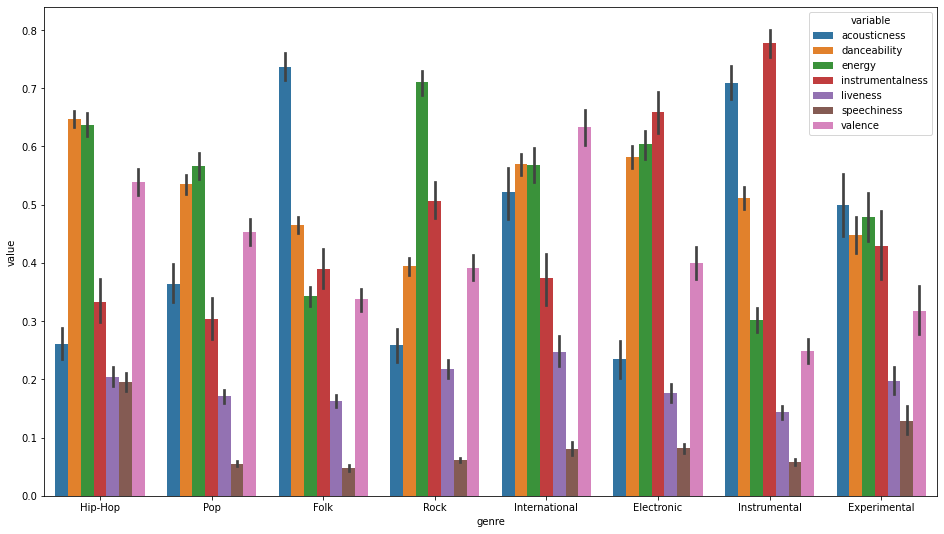

In [51]:
plt.figure(figsize=(16, 9))
sns.barplot(data=tidy_df, x='genre', y='value', hue='variable')